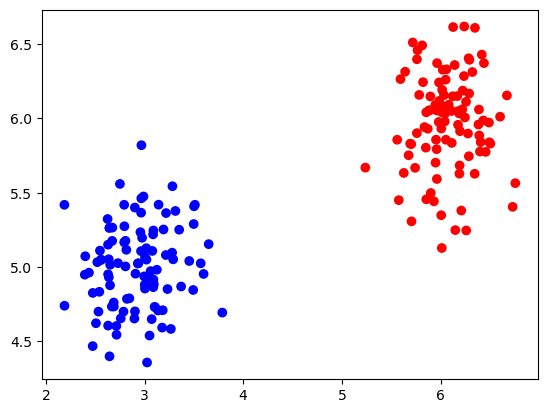

(100, 2)


In [574]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N1 = 100
N2 = 100
K = 2
sigma = 0.1

mean = (6, 6)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (3, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = np.zeros([len(X), K])

for n in range(0, len(X)):
    if n < len(X1):
        T[n][0] = 1
    if N1 <= n < len(X1) + len(X2):
        T[n][1] = 1

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()
print(X1.shape)

In [575]:
def fi_func(xn, M, m, X):
    x_max = np.max(X)
    x_min = np.min(X)
    M = M - 1
    mu = np.linspace(x_min - 0.5, x_max + 0.5, M)
    # print(x_min,x_max)
    # print(mu)
    sigma = 1
    item = [- ((X[:, 0] - mu[i]) ** 2 + (X[:, 1] - mu[i]) ** 2) / (2 * (sigma ** 2))
            for i in
            range(M)]
    # print(X.shape)
    result = np.exp(item)
    res = result.T
    res = np.concatenate((np.ones((N1 + N2, 1)), res), axis=1)
    res[:, 0] = 1
    print(res.shape)
    return res


def a(w, fi_data):
    return fi_data @ w


def sigmoid(a):
    return 1 / (1 + np.exp(-a))


def newton(X, T, M, alpha):
    N = N1 + N2
    t = np.zeros([N, 1])
    for i in range(N):
        t[i] = T[i][0]

    w = np.zeros([M, 1])
    sn_1 = (1 / alpha) * np.identity(M)

    fi_data = fi_func(None, M, None, X)
    # print(fi_data[0])
    # fi_square = fi(0, M, 0, X)
    # newton
    # sig_fun = sigmoid(a(w, fi_data))
    # print(sig_fun[0].shape, (1 - sig_fun[0]).shape, (sig_fun[0] * (1 - sig_fun[0])).shape)
    m0 = 0
    while True:
        sig_data = sigmoid(a(w, fi_data))
        R = np.zeros([N, N])
        for i in range(N):
            R[i][i] = sig_data[i] * (1 - sig_data[i])

        # E_l = sn_1 @ (w - m0)
        # dif = sig_data - t
        # E_r = np.dot(fi_data.T, dif)
        E = sn_1 @ (w - m0) + fi_data.T @ (sig_data - t)

        # H_rr = np.dot(fi_data.T, R)
        # H_r = np.dot(H_rr, fi_data)
        H = sn_1 + fi_data.T @ R @ fi_data
        H_1 = np.linalg.inv(H)

        w_new = w - H_1 @ E
        if np.linalg.norm(w_new - w) < 2e-10:
            w = w_new
            return w, H_1, fi_data
        else:
            w = w_new

# fi_data = fi_func(1, 3, 2, X)
# M = 3
# w = np.zeros([M, 1])
# sigmoid(a(w, fi_data))


(200, 40)


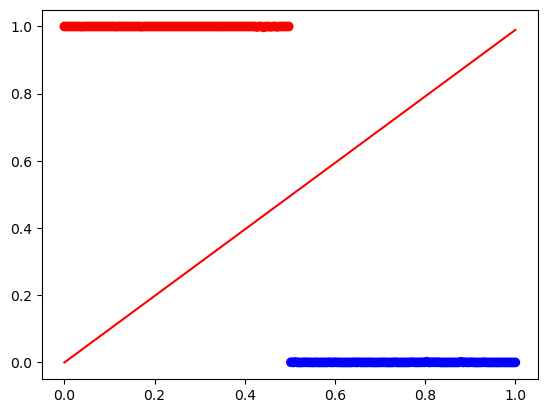

In [576]:
def display(m, alpha, x, y_, y_noise):
    fig, ax = plt.subplots()
    # line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line1, = ax.plot(x, y_, color='red')
    # ax.legend()
    # # ax.set_title('Linear and Quadratic Functions')
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')

    plt.scatter(x, y_noise, marker='o', c=color)
    plt.show()


M = 40
alpha = 300
w, H_1, fi_square = newton(X, T, M, alpha)
x = np.linspace(0, 1, 200)
# print(x.shape)
display(M, alpha, x, (np.array([x for _ in range(M)]).T @ w).reshape(200), sigmoid(a(w, fi_square)).reshape(200))

In [577]:
def fi_classification_fun(xn, M, m, X):
    x_max = np.max(X)
    x_min = np.min(X)
    mu = np.linspace(x_min, x_max, M)
    sigma = 1
    x_1 = xn[0]
    x_2 = xn[1]
    item = - ((x_1 - mu[m]) ** 2 + (x_2 - mu[m]) ** 2) / (2 * (sigma ** 2))
    result = np.exp(item)
    return result


def predictive_t(w, H_1, M, x_input, X):
    # Ptn
    fi_list = np.zeros([M, 1])

    for m in range(M):
        # if m == 0:
        #     fi_list[m][0] = 1
        # else:
        fi_list[m][0] = fi_classification_fun(x_input, M, m, X)
    # print(fi_list)
    a1 = a(w, fi_list.reshape(1, -1))

    p_t = sigmoid(a1)
    # print(p_t.shape)
    return p_t

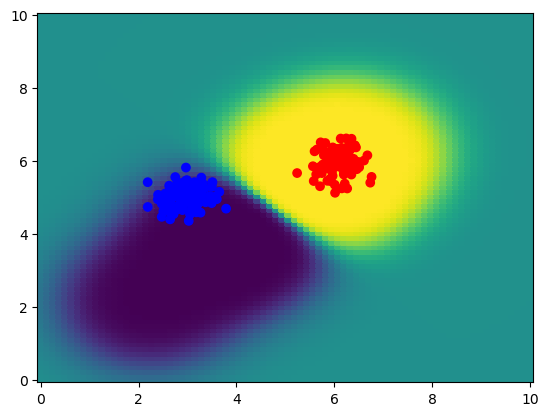

In [578]:
nodes = 80
ix = np.linspace(0, 10, nodes)
iy = np.linspace(0, 10, nodes)
ic = np.zeros([nodes, nodes])
iX, iY = np.meshgrid(ix, iy)

# dim = 2
# print(ix, iX)
# print((ix+).shape)
# x_test = np.zeros([nodes * nodes, 2])
x_single = np.zeros([1, 2])

for i in range(nodes):
    for j in range(nodes):
        x_single[0][0] = ix[i]
        x_single[0][1] = iy[j]
        pt_x = predictive_t(w, H_1, M, x_single[0], X)
        ic[i][j] = pt_x

import matplotlib.colors as mcolors

# colors = [(0, "green"), (0.5, "lime"), (1, "blue")]
# cmap = mcolors.LinearSegmentedColormap.from_list("GtoB", colors)
plt.pcolormesh(iX, iY, ic, edgecolors='face')

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()
# cm = plt.cm.get_cmap('rainbow')
# fig, ax = plt.subplots(figsize=(5, 5))
# c = ax.pcolormesh(iX, iY, ic, cmap=cm)
# fig.colorbar(c, ax=ax)
# plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
# plt.show()
# print(ic[23:28])

In [579]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# 
# # 创建一个自定义的 colormap
# colors = [(0, "yellow"), (0.5, "lime"), (1, "blue")]  # R -> G -> B
# n_bins = [3]  # Discretizes the interpolation into bins
# cmap_name = 'custom1'
# cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=100 * 100)
# 
# # 创建一个测试矩阵
# data = ic
# 
# # 使用 imshow 绘制矩阵，并使用自定义的 colormap
# plt.imshow(data, cmap=cm)
# 
# # 添加颜色条
# plt.colorbar()
# 
# # 显示图像
# plt.show()